# Assignment: Linear and logistic regression

## Objectives

The objectives of this assignment are:
1. to learn to use linear regression for predicting continuously varying target variables 
2. to learn to use logistic regression for binary classification
3. to learn to estimate the relative importance of input features

## Setup

In this assignment, use the Real Estate Valuation dataset that is available at [https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set). The data is collected from New Taipei City, Taiwan. 

## Task

The assignment consists of constructing *two* separate models for predicting the real estate prices in the dataset: one with linear and one with logistic regression.

1. **Linear regression model**: construct a linear regression model for predicting the continuous target variable "Y house price of unit area" in the dataset.

2. **Logistic regression model**: convert the target variable into a binary-valued one according to whether the original target value is above or below the average house price of unit area (within the training set samples), and construct a binary classifier for predicting its value with logistic regression.

Both models should be validated, with appropriate metrics presented and discussed. 

Remember to draw conclusions from your results and interpret your findings! Can you e.g. estimate which of the input variables has the most important role when predicting the house prices, and which ones are less important? Also, give some thought to whether the input data should be standardized before modeling or not. 

Prepare a Jupyter notebook containing a full account of the problem treatment. Construct your notebook to include sections for each of the six separate stages in the CRISP-DM model, with appropriate contents (include subsections for the two separate tasks in "Modeling" and "Evaluation").

## Deliverables

Submit a GitHub permalink that points to the Jupyter notebook as instructed in Oma. The submitted notebook must contain the problem analysis written in accordance with the CRISP-DM process model, complete with Markdown blocks and comments that clearly explain what has been done. 


## Business Understanding

The aim of this assignment is to predict real estate prices using the Real Estate Valuation dataset from New Taipei City, Taiwan. Two models are included: first, a linear regression model to predict the continuous target variable “house price of unit area,” and second, a logistic regression model to classify whether the price is above or below the average value in the training set.


## Data understanding
Dataset is imported from UC Irvine Machine Learning Repository, by using their python package. It consists of real estate valuation data taken from Sindian Dist., New Taipei City, Taiwan.


In [250]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
df = real_estate_valuation.data.features 

# Combining features and target variable into a single dataframe
df['Y house price of unit area'] = real_estate_valuation.data.targets
display(df.head())


C:\Users\DELL\AppData\Local\Temp\ipykernel_16248\60843739.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y house price of unit area'] = real_estate_valuation.data.targets


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


There are 6 features and one target variable in dataset and 414 instances.
Feature types are integer and float.  

In [251]:

# variable information 
display(real_estate_valuation.variables) 

,name,role,type,demographic,description,units,missing_values
0,No,ID,Integer,None,None,None,no
1,X1 transaction date,Feature,Continuous,None,"for example, 2013.250=2013 March, 2013.500=201...",None,no
2,X2 house age,Feature,Continuous,None,None,year,no
3,X3 distance to the nearest MRT station,Feature,Continuous,None,None,meter,no
4,X4 number of convenience stores,Feature,Integer,None,number of convenience stores in the living cir...,integer,no
5,X5 latitude,Feature,Continuous,None,"geographic coordinate, latitude",degree,no
6,X6 longitude,Feature,Continuous,None,"geographic coordinate, longitude",degree,no
7,Y house price of unit area,Target,Continuous,None,"10000 New Taiwan Dollar/Ping, where Ping is a ...",10000 New Taiwan Dollar/Ping,no


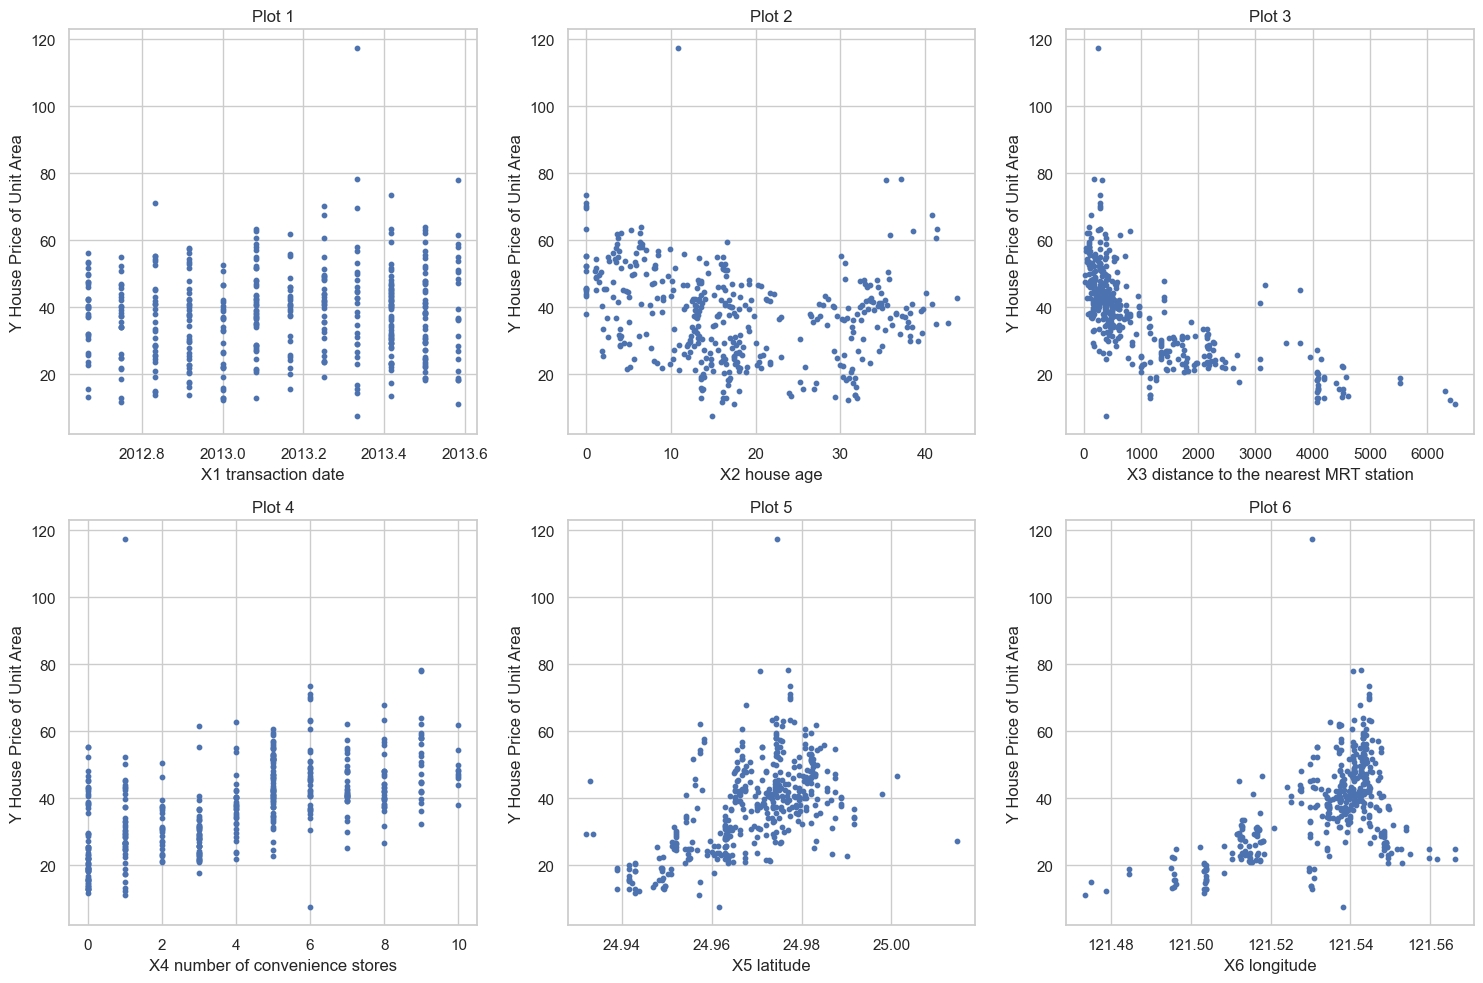

In [252]:
import matplotlib.pyplot as plt

y = df['Y house price of unit area']  # target
feature_cols = [c for c in df.columns if c != 'Y house price of unit area']
number_of_plots = len(feature_cols)

rows, cols = (number_of_plots + 2) // 3, 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    X = df[col]
    axes[i].scatter(X, y, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Y House Price of Unit Area')
    axes[i].set_title(f"Plot {i+1}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


From these plots we can see that features doesnt have linear correlation

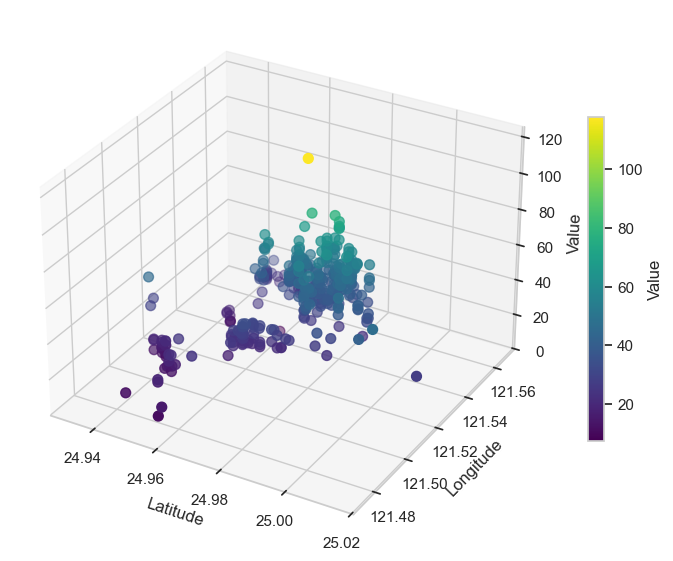

In [253]:
import seaborn as sns

lat = df["X5 latitude"]
lon = df["X6 longitude"]
value = df["Y house price of unit area"]

sns.set(style="whitegrid")

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot in 3D
sc = ax.scatter(lat, lon, value, c=value, cmap="viridis", s=50)

# Add labels
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Value")

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.6, label="Value")

plt.show()

## Data preparation
Here we normalize data

In [254]:
for col in df.columns:
    if df[col].dtype != 'float64':
        df[col]=df[col].astype(dtype='float64')

# All features are now float64
display(df.head())

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X = df.drop(columns=['Y house price of unit area'])

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# First 10 rows of scaled features
display(X_scaled.head(10))

C:\Users\DELL\AppData\Local\Temp\ipykernel_16248\922562578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].astype(dtype='float64')


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937
5,-1.711384,-0.932668,0.865586,-0.371925,-0.482451,-1.358313
6,-1.711384,1.475337,-0.365237,0.987694,0.830961,0.199555
7,0.951718,0.227393,-0.631678,0.647789,0.918898,0.581846
8,1.246435,1.229263,3.512777,-1.051734,-1.458635,-3.182350
9,0.951718,0.016473,0.554738,-0.371925,-0.138769,-1.206962


## Modeling: Linear Regression



Here we build regression model and train it with scaled data

In [255]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled,y)


LinearRegression()

Here we get start value of y (intercept) when x is zero and coefficient of function.

In [256]:

b0 = model.intercept_ 
b1 = model.coef_[0] 
print("Intercept: %.2f" % b0)

for col, coef in zip(X_scaled.columns, model.coef_):
    print(f"{col}: {coef:.4f}")

Intercept: 37.98
X1 transaction date: 1.4493
X2 house age: -3.0688
X3 distance to the nearest MRT station: -5.6568
X4 number of convenience stores: 3.3341
X5 latitude: 2.7948
X6 longitude: -0.1904


ValueError: x and y must be the same size

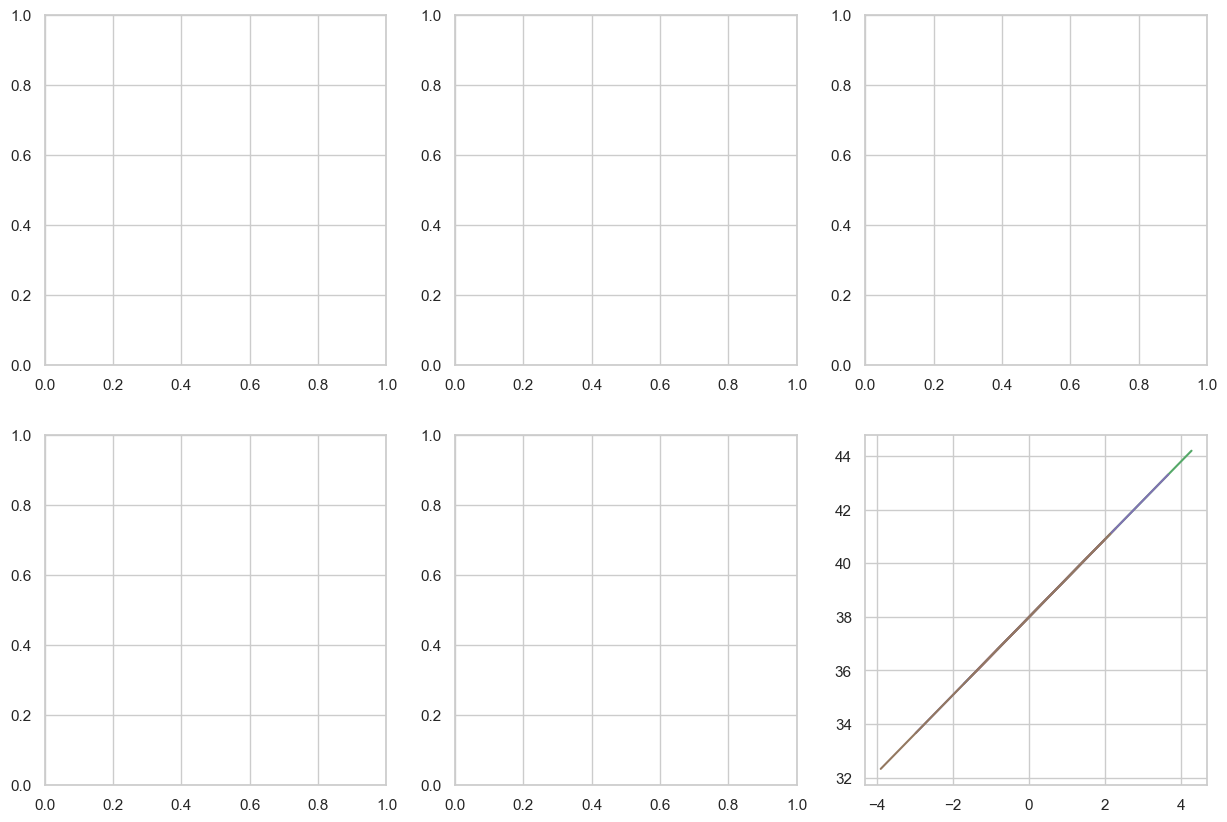

In [257]:
import numpy as np




feature_cols = X_scaled.columns
number_of_plots = len(feature_cols)

rows, cols = (number_of_plots + 2) // 3, 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    xs = np.linspace(X_scaled.min(), X_scaled.max())

    ys = b0 + model.coef_[i] * xs
    plt.plot(xs, ys)
    plt.scatter(X_scaled, y)
    plt.xlabel(col.title())
    plt.ylabel('Y House Price of Unit Area')
    plt.show()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Modeling: Logistic Regression